In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
#Assigning DataFrames

general_data = pd.read_csv('general_data.csv')
employee_survey_data = pd.read_csv('employee_survey_data.csv')
manager_survey_data = pd.read_csv('manager_survey_data.csv')

In [4]:
print(general_data.shape , employee_survey_data.shape , manager_survey_data.shape)
print(employee_survey_data.columns.tolist())
print(manager_survey_data.columns.tolist())

(4410, 24) (4410, 4) (4410, 3)
['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
['EmployeeID', 'JobInvolvement', 'PerformanceRating']


# Data preprocessing and Cleaning the Data

In [71]:
general_data['NumCompaniesWorked'].fillna(value=general_data['NumCompaniesWorked'].mean(), inplace=True)
general_data['TotalWorkingYears'].fillna(value=general_data['TotalWorkingYears'].mean(), inplace=True)
employee_survey_data['EnvironmentSatisfaction'].fillna(value=employee_survey_data['EnvironmentSatisfaction'].mean(), inplace=True)
employee_survey_data['JobSatisfaction'].fillna(value=employee_survey_data['JobSatisfaction'].mean(), inplace=True)
employee_survey_data['WorkLifeBalance'].fillna(value=employee_survey_data['WorkLifeBalance'].mean(), inplace=True)

In [72]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [73]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4410 non-null   float64
 2   JobSatisfaction          4410 non-null   float64
 3   WorkLifeBalance          4410 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [74]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [75]:
print(general_data.shape ,  employee_survey_data.shape ,  manager_survey_data.shape)
print(employee_survey_data.columns.tolist())
print(manager_survey_data.columns.tolist())

(4410, 24) (4410, 4) (4410, 3)
['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
['EmployeeID', 'JobInvolvement', 'PerformanceRating']


# Merging the Datasets

In [16]:
merge = pd.merge(employee_survey_data, manager_survey_data, on='EmployeeID')
dataset = pd.merge(general_data, merge, on='EmployeeID')
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [17]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

# Exploring the Data

In [18]:
print('Total Attrition Number is', dataset.Attrition.value_counts()[1])

Total Attrition Number is 711


### Age and Gender

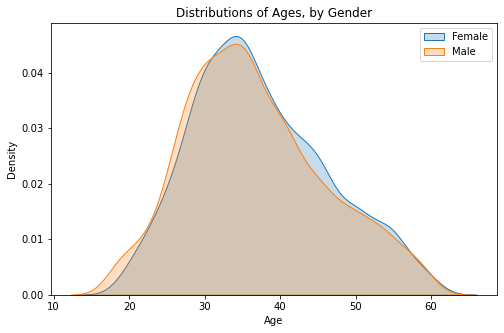

In [19]:
female_age = dataset[dataset['Gender']=='Female']['Age']
male_age = dataset[dataset['Gender']=='Male']['Age']

plt.figure(figsize = (8,5))
sns.kdeplot(data=female_age, label="Female", shade=True)
sns.kdeplot(data=male_age, label="Male", shade=True)

plt.title("Distributions of Ages, by Gender")
plt.legend()
plt.show()

Age Distribution is balanced.

### Distance From Home

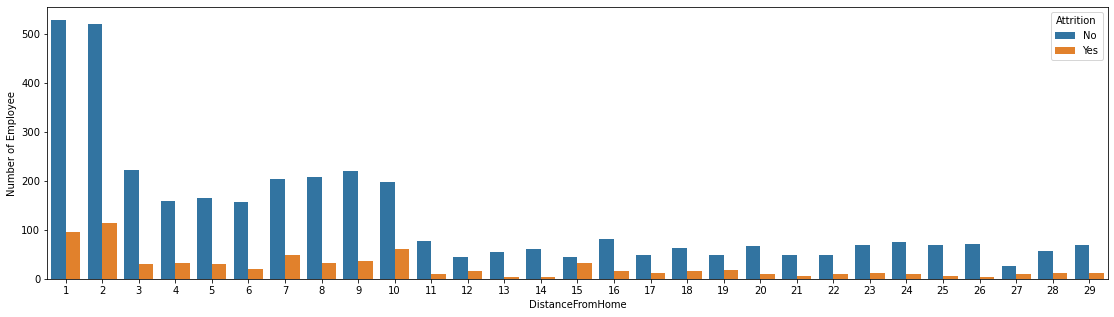

In [20]:
plt.figure(figsize = (19,5))
sns.countplot(x = 'DistanceFromHome', data = dataset, hue='Attrition')
plt.ylabel('Number of Employee')
plt.show()

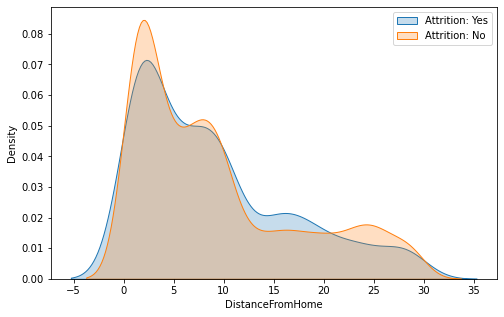

In [21]:
dist_yes = dataset[dataset['Attrition']=='Yes']['DistanceFromHome']
dist_no = dataset[dataset['Attrition']=='No']['DistanceFromHome']

plt.figure(figsize = (8,5))
sns.kdeplot(data=dist_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=dist_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

Distance from home is not a factor that causes more Attrition.

### Education

Text(0, 0.5, 'Number of Employee')

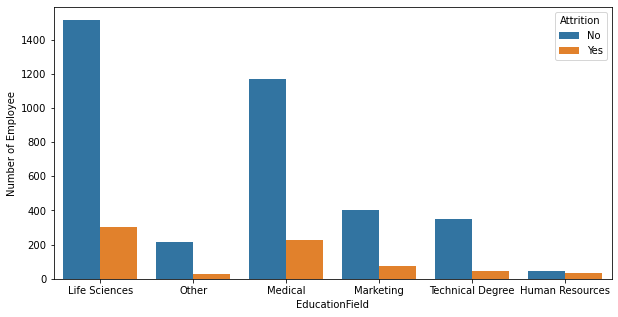

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'EducationField', data = dataset, hue='Attrition')
plt.ylabel('Number of Employee')

In [23]:
edu = dataset['EducationField'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['EducationField'].value_counts()

edu_field_per = at_yes/edu*100

print(round(edu_field_per,2))

Human Resources     40.74
Life Sciences       16.67
Marketing           15.72
Medical             16.16
Other               12.20
Technical Degree    11.36
Name: EducationField, dtype: float64


Human resources has the highest ratio. 

### Gender

Text(0, 0.5, 'Number of Employee')

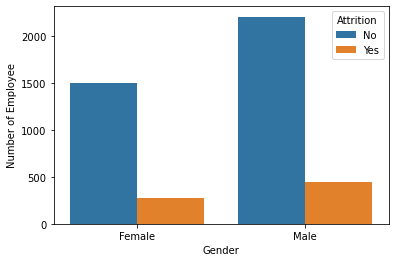

In [24]:
sns.countplot(x = 'Gender', data = dataset, hue='Attrition')
plt.ylabel('Number of Employee')

In [25]:
at_yes = dataset[dataset['Attrition']=='Yes']['Gender'].value_counts()

count_female = (dataset['Gender'] == 'Female').value_counts()[1]
fem_perc = (at_yes[1]/count_female)*100
count_male = (dataset['Gender'] == 'Male').value_counts()[1]
male_perc = (at_yes[0]/count_male)*100

print('Female Left Job Percentage:', round(fem_perc,3) , '%')
print('Male Left Job Percentage:', round(male_perc,3) , '%')

Female Left Job Percentage: 15.306 %
Male Left Job Percentage: 16.667 %


The ratio of males and females who left the job is approximately the same. 

### Job Level

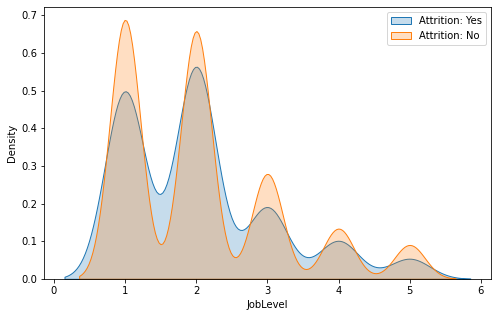

In [26]:
job_level_yes = dataset[dataset['Attrition']=='Yes']['JobLevel']
job_level_no = dataset[dataset['Attrition']=='No']['JobLevel']

plt.figure(figsize = (8,5))
sns.kdeplot(data=job_level_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=job_level_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

In [27]:
job_level_total = dataset['JobLevel'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['JobLevel'].value_counts()

job_level_perc = at_yes/job_level_total*100

print(round(job_level_perc,2))

1    15.47
2    17.79
3    14.68
4    16.04
5    13.04
Name: JobLevel, dtype: float64


Level 2 has the most number of attritions.

### Job Role


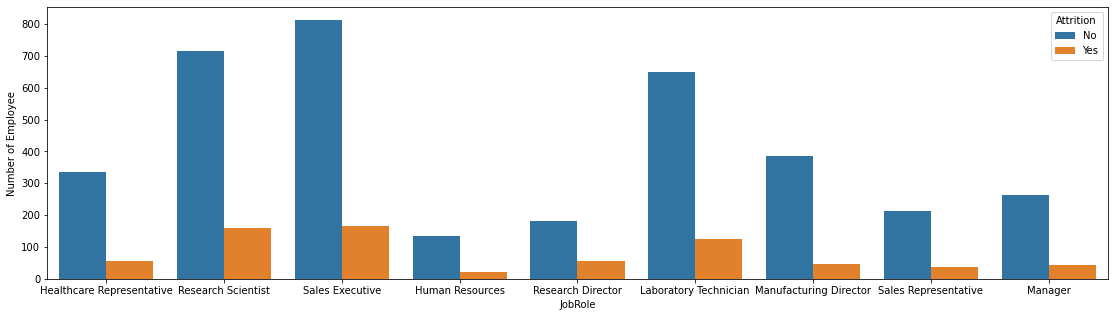

In [28]:
plt.figure(figsize = (19,5))
sns.countplot(x = 'JobRole', data = dataset, hue='Attrition')
plt.ylabel('Number of Employee')
plt.show()

In [29]:
edu = dataset['JobRole'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['JobRole'].value_counts()

job_role_per = at_yes/edu*100

print(round(job_role_per,2))

Healthcare Representative    14.50
Human Resources              13.46
Laboratory Technician        16.22
Manager                      13.73
Manufacturing Director       11.03
Research Director            23.75
Research Scientist           18.15
Sales Executive              16.87
Sales Representative         14.46
Name: JobRole, dtype: float64


The highest resign ratio here is that of a research director.

### Marital Status

Text(0, 0.5, 'Number of Employee')

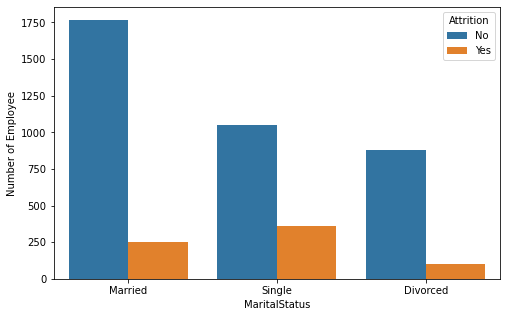

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x='MaritalStatus', data = dataset, hue= 'Attrition')
plt.ylabel('Number of Employee')

In [31]:
ms = dataset['MaritalStatus'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['MaritalStatus'].value_counts()

ms_perc = at_yes/ms*100

print(round(ms_perc,2))

Divorced    10.09
Married     12.48
Single      25.53
Name: MaritalStatus, dtype: float64


It is observed that employees who are single tend to leave the job more.

### Monthly Income

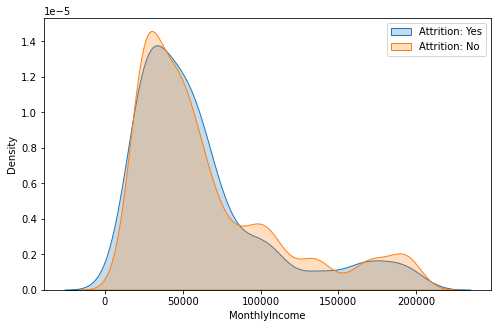

In [32]:
monthly_inc_yes = dataset[dataset['Attrition']=='Yes']['MonthlyIncome']
monthly_inc_no = dataset[dataset['Attrition']=='No']['MonthlyIncome']

plt.figure(figsize = (8,5))
sns.kdeplot(data=monthly_inc_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=monthly_inc_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

In [33]:
#Average Monthyly Salaries as per department

income_sales = dataset[dataset['Department']=='Sales']['MonthlyIncome']
income_RD = dataset[dataset['Department']=='Research & Development']['MonthlyIncome']
income_HR = dataset[dataset['Department']=='Human Resources']['MonthlyIncome']

print('Sales Dep. Average:',round(income_sales.mean()),2)
print('R&D Dep. Average:',round(income_RD.mean()),2)
print('Human Resources Dep. Average:',round(income_HR.mean()),2)

Sales Dep. Average: 61384 2
R&D Dep. Average: 67188 2
Human Resources Dep. Average: 57904 2


Human Resources Department has the least average monthly salary.

### Number of Companies worked

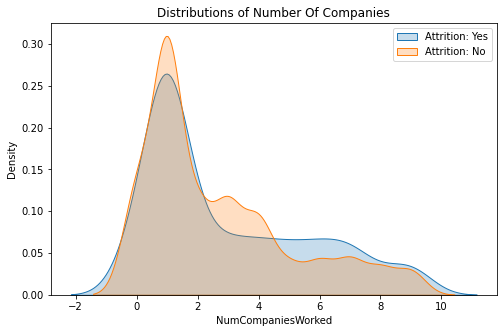

In [34]:
num_com_yes = dataset[dataset['Attrition']=='Yes']['NumCompaniesWorked']
num_com_no = dataset[dataset['Attrition']=='No']['NumCompaniesWorked']

plt.figure(figsize = (8,5))
sns.kdeplot(data=num_com_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=num_com_no, label="Attrition: No", shade=True)

plt.title("Distributions of Number Of Companies")
plt.legend()
plt.show()

### Total Working Years

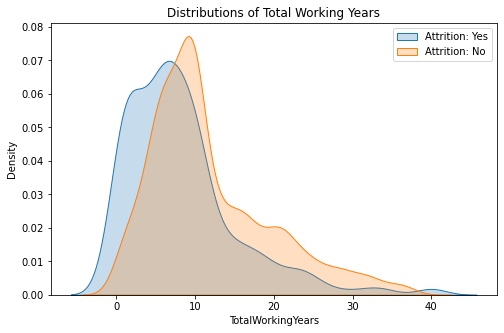

In [35]:
work_year_yes = dataset[dataset['Attrition']=='Yes']['TotalWorkingYears']
work_year_no = dataset[dataset['Attrition']=='No']['TotalWorkingYears']

plt.figure(figsize = (8,5))
sns.kdeplot(data=work_year_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=work_year_no, label="Attrition: No", shade=True)

plt.title("Distributions of Total Working Years")
plt.legend()
plt.show()

The employees with the less total working years are more likely to leave the job.

### Training Times Last Year

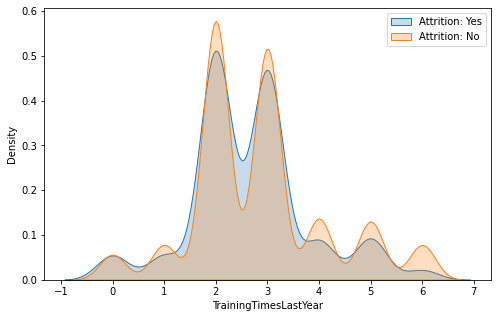

In [36]:
training_yes = dataset[dataset['Attrition']=='Yes']['TrainingTimesLastYear']
training_no = dataset[dataset['Attrition']=='No']['TrainingTimesLastYear']

plt.figure(figsize = (8,5))
sns.kdeplot(data=training_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=training_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

In [37]:
training_total = dataset['TrainingTimesLastYear'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['TrainingTimesLastYear'].value_counts()

training_perc = at_yes/job_level_total*100

print(round(training_perc,2))

0      NaN
1     1.84
2    17.60
3    39.45
4    15.09
5    24.64
6      NaN
dtype: float64


### Training Times Last Year

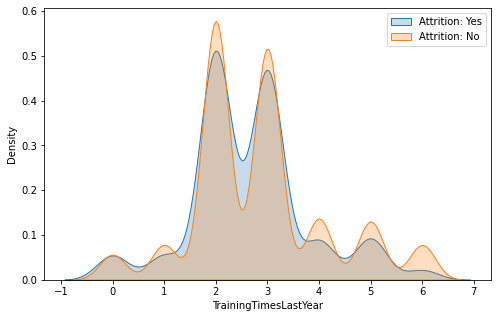

In [38]:
training_yes = dataset[dataset['Attrition']=='Yes']['TrainingTimesLastYear']
training_no = dataset[dataset['Attrition']=='No']['TrainingTimesLastYear']

plt.figure(figsize = (8,5))
sns.kdeplot(data=training_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=training_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

In [39]:
training_total = dataset['TrainingTimesLastYear'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['TrainingTimesLastYear'].value_counts()

training_perc = at_yes/training_total*100

print(round(training_perc,2))

0    18.52
1    14.08
2    17.18
3    17.52
4    13.01
5    14.29
6     6.15
Name: TrainingTimesLastYear, dtype: float64


### Years Since Last Promotion

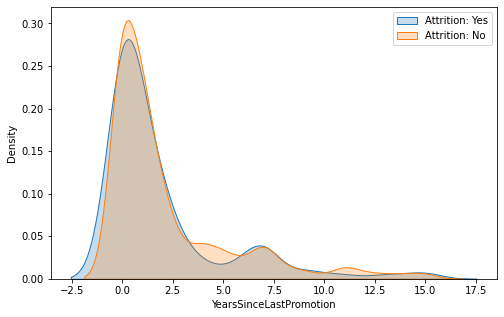

In [40]:
promo_yes = dataset[dataset['Attrition']=='Yes']['YearsSinceLastPromotion']
promo_no = dataset[dataset['Attrition']=='No']['YearsSinceLastPromotion']

plt.figure(figsize = (8,5))
sns.kdeplot(data=promo_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=promo_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

In [41]:
promo_total = dataset['YearsSinceLastPromotion'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['YearsSinceLastPromotion'].value_counts()

promo_perc = at_yes/promo_total*100

print(round(promo_perc,2))

0     18.93
1     13.73
2     16.98
3     17.31
4      8.20
5      4.44
6     18.75
7     21.05
8       NaN
9     23.53
10    16.67
11     8.33
12      NaN
13    20.00
14    11.11
15    23.08
Name: YearsSinceLastPromotion, dtype: float64


### Years with Current Manager

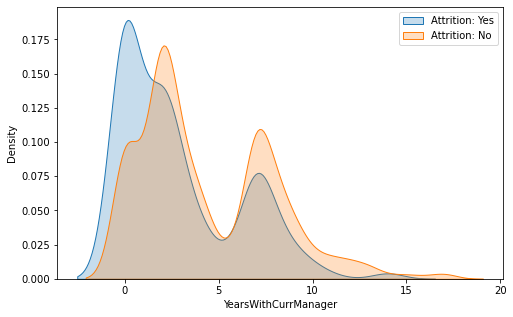

In [42]:
curr_yes = dataset[dataset['Attrition']=='Yes']['YearsWithCurrManager']
curr_no = dataset[dataset['Attrition']=='No']['YearsWithCurrManager']

plt.figure(figsize = (8,5))
sns.kdeplot(data=curr_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=curr_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

In [43]:
curr_total = dataset['YearsWithCurrManager'].value_counts()
at_yes = dataset[dataset['Attrition']=='Yes']['YearsWithCurrManager'].value_counts()

curr_perc = at_yes/curr_total*100

print(round(curr_perc,2))

0     32.32
1     14.47
2     14.53
3     13.38
4     11.22
5     12.90
6     13.79
7     14.35
8      9.35
9      9.38
10    11.11
11     4.55
12      NaN
13      NaN
14    40.00
15      NaN
16      NaN
17      NaN
Name: YearsWithCurrManager, dtype: float64


### Environment Satisfaction

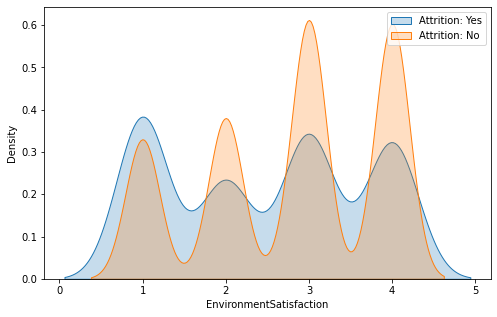

In [44]:
sat_yes = dataset[dataset['Attrition']=='Yes']['EnvironmentSatisfaction']
sat_no = dataset[dataset['Attrition']=='No']['EnvironmentSatisfaction']

plt.figure(figsize = (8,5))
sns.kdeplot(data=sat_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=sat_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

### Job Satisfaction


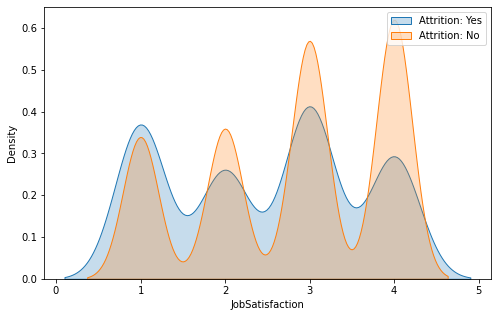

In [45]:
sat_yes = dataset[dataset['Attrition']=='Yes']['JobSatisfaction']
sat_no = dataset[dataset['Attrition']=='No']['JobSatisfaction']

plt.figure(figsize = (8,5))
sns.kdeplot(data=sat_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=sat_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

### Work Life Balance

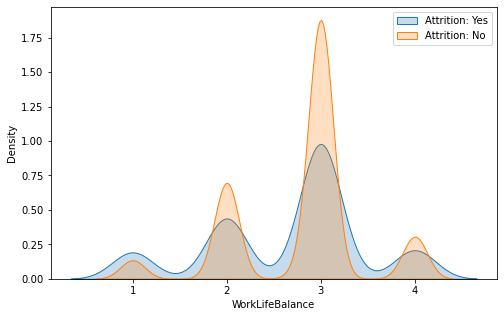

In [46]:
balance_yes = dataset[dataset['Attrition']=='Yes']['WorkLifeBalance']
balance_no = dataset[dataset['Attrition']=='No']['WorkLifeBalance']

plt.figure(figsize = (8,5))
sns.kdeplot(data=balance_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=balance_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

### Job Involvement

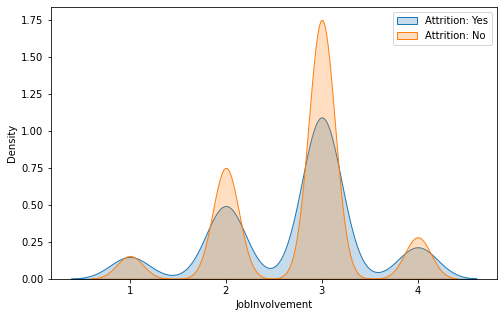

In [47]:
involve_yes = dataset[dataset['Attrition']=='Yes']['JobInvolvement']
involve_no = dataset[dataset['Attrition']=='No']['JobInvolvement']

plt.figure(figsize = (8,5))
sns.kdeplot(data=involve_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=involve_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

### Performance Rating

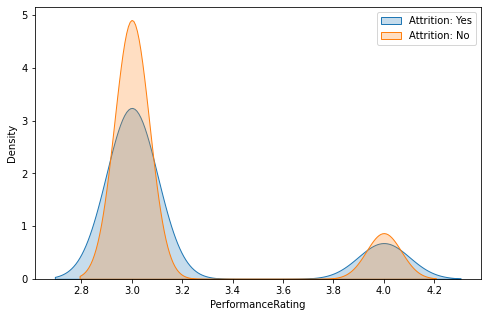

In [48]:
balance_yes = dataset[dataset['Attrition']=='Yes']['PerformanceRating']
balance_no = dataset[dataset['Attrition']=='No']['PerformanceRating']

plt.figure(figsize = (8,5))
sns.kdeplot(data=balance_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=balance_no, label="Attrition: No", shade=True)

plt.legend()
plt.show()

## Splitting the Dataset

In [49]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [50]:
cols = general_data.columns.tolist()
cols.remove('Attrition')
print(cols)

['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [51]:
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', ]
X = general_data[cols]
y = general_data['Attrition']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Encoding Categorical Data

In [53]:
!pip install category_encoders
import category_encoders as ce

You should consider upgrading via the 'C:\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [54]:
encoder = ce.OneHotEncoder(cols=categorical_cols)
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)
X_train.head()

C:\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Age,BusinessTravel_1,BusinessTravel_2,BusinessTravel_3,Department_1,Department_2,Department_3,DistanceFromHome,Education,EducationField_1,...,NumCompaniesWorked,Over18_1,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
2736,26,1,0,0,1,0,0,4,4,1,...,7.0,1,20,8,1,5.0,2,2,0,0
1800,50,1,0,0,1,0,0,8,4,1,...,5.0,1,11,8,1,30.0,3,4,0,3
4173,36,1,0,0,1,0,0,1,3,1,...,7.0,1,12,8,1,10.0,2,5,0,3
2615,39,1,0,0,1,0,0,4,3,1,...,0.0,1,12,8,1,21.0,5,20,11,10
1775,25,1,0,0,1,0,0,8,3,1,...,1.0,1,15,8,0,6.0,3,6,1,4


In [55]:
encoder = ce.OneHotEncoder(cols=['Attrition'])
y_train = encoder.fit_transform(y_train)
y_train.head()

C:\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Attrition_1,Attrition_2
2736,1,0
1800,1,0
4173,0,1
2615,1,0
1775,1,0


In [56]:
del y_train["Attrition_2"]
y_train.head()

,Attrition_1
2736,1
1800,1
4173,0
2615,1
1775,1


## Feature Scaling

In [57]:
cols = X_train.columns

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [60]:
X_train.head()

,Age,BusinessTravel_1,BusinessTravel_2,BusinessTravel_3,Department_1,Department_2,Department_3,DistanceFromHome,Education,EducationField_1,...,NumCompaniesWorked,Over18_1,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.189641,0.643783,-0.485117,-0.337962,0.727738,-0.654607,-0.220249,-0.652441,1.070798,1.192031,...,1.704213,0.0,1.296098,0.0,0.244864,-0.800054,-0.636600,-0.799585,-0.674827,-1.142665
1,1.453237,0.643783,-0.485117,-0.337962,0.727738,-0.654607,-0.220249,-0.156436,1.070798,1.192031,...,0.907600,0.0,-1.160800,0.0,0.244864,2.410201,0.144854,-0.476961,-0.674827,-0.296667
2,-0.088442,0.643783,-0.485117,-0.337962,0.727738,-0.654607,-0.220249,-1.024445,0.083861,1.192031,...,1.704213,0.0,-0.887812,0.0,0.244864,-0.158003,-0.636600,-0.315649,-0.674827,-0.296667
3,0.241918,0.643783,-0.485117,-0.337962,0.727738,-0.654607,-0.220249,-0.652441,0.083861,1.192031,...,-1.083931,0.0,-0.887812,0.0,0.244864,1.254509,1.707760,2.104032,2.730859,1.677330
4,-1.299761,0.643783,-0.485117,-0.337962,0.727738,-0.654607,-0.220249,-0.156436,0.083861,1.192031,...,-0.685625,0.0,-0.068846,0.0,-0.933835,-0.671644,0.144854,-0.154337,-0.365219,-0.014667


In [61]:
X_train.isnull().values.any()

False

In [62]:
X_train.columns[X_train.isna().any()].tolist()

[]

# Training the model

## Applying Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

# Predictions
Accuracy metrics used:


1.   Accuracy Score
2.   Confusion Matrix
3.   Classification Report



In [64]:
encoder = ce.OneHotEncoder(cols=['Attrition'])
y_test = encoder.fit_transform(y_test)

C:\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [65]:
del y_test["Attrition_2"]
y_test.head()

,Attrition_1
1567,1
683,1
117,1
1581,1
3861,1


In [66]:
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Accuracy Score

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.8450
Training-set accuracy score: 0.8464


## Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
acc= (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print('Accuracy = ',acc)

Confusion matrix

 [[  8 163]
 [  8 924]]

True Positives(TP) =  8

True Negatives(TN) =  924

False Positives(FP) =  163

False Negatives(FN) =  8
Accuracy =  0.8449682683590208


## Classification Report

In [70]:
from sklearn.metrics import classification_report
cm = classification_report(y_test, y_pred)
print('Classification Report \n\n', cm)

Classification Report 

               precision    recall  f1-score   support

           0       0.50      0.05      0.09       171
           1       0.85      0.99      0.92       932

    accuracy                           0.84      1103
   macro avg       0.68      0.52      0.50      1103
weighted avg       0.80      0.84      0.79      1103



# Conclusion

**Hence, by logistic regression, we get an accuracy of 84% approx. to determine if an employee will resign or not.**